In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
import scipy.signal

plt.rcParams["font.size"] = 22
plt.rcParams['text.usetex'] = True

In [2]:
# import ugradio

# Reading in the Data

In [3]:
data = pd.read_csv('final_data.csv')
# data

In [4]:
# names of all data in dataframe
names =['0.625 MHz', '1.25 MHz', '1.875 MHz', '2.5 MHz', '3.125 MHz', '3.75 MHz', '4.375 MHz', 
        '5 MHz', '5.625 MHz', '6.25 MHz']

## Creating "Times" Array

In [5]:
# dt = 1 / (sampling frequency)
sample_freq = (62.5 / 10 * u.MHz).to(u.Hz) #Hz/N where we set N to be 10
print('sample frequency = ' + str(sample_freq.to(u.MHz)))
dt = 1 / sample_freq # s
dt = dt * 10**6 # microsecond
total_time = dt * 16000 # multiply by 16000 (the number of samples taken)

times = np.arange(0, 16000) * dt.value

sample frequency = 6.25 MHz


# 5.2

In [6]:
true_freqs =[0.625, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5, 5.625, 6.25] # MHz

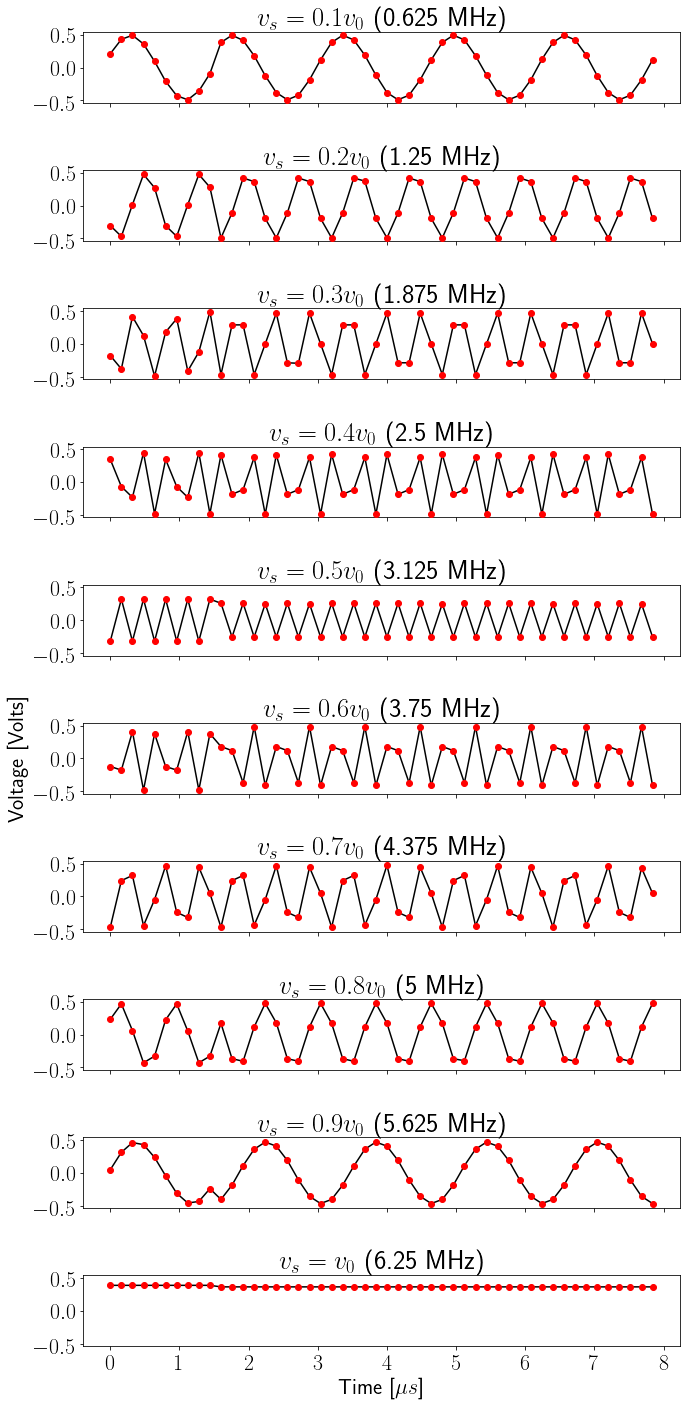

In [7]:
# plotting the waveforms
plt.rcParams["figure.figsize"] = (10, 20)
fig, ax = plt.subplots(10, 1, sharex = True, sharey=True)

num_samples = 50

for i in range(len(names)):
    ax[i].plot(times[:num_samples], data[names[i]][:num_samples]/(2**15), c='black')
    if i == 9:
        ax[i].set_title('$v_s = v_0$ ({} MHz)'.format(true_freqs[i]))
        ax[i].set_xlabel('Time [$\mu s$]')
    else:
        ax[i].set_title('$v_s = 0.{}v_0$ ({} MHz)'.format(i+1, true_freqs[i]))  #CHANGE TO NU
    ax[i].scatter(times[:num_samples], data[names[i]][:num_samples]/(2**15), c='red', zorder=10)

ax[5].set_ylabel('Voltage [Volts]')    
    
plt.tight_layout()
plt.savefig('figures/waveforms.eps')

## Fourier Power Spectrum

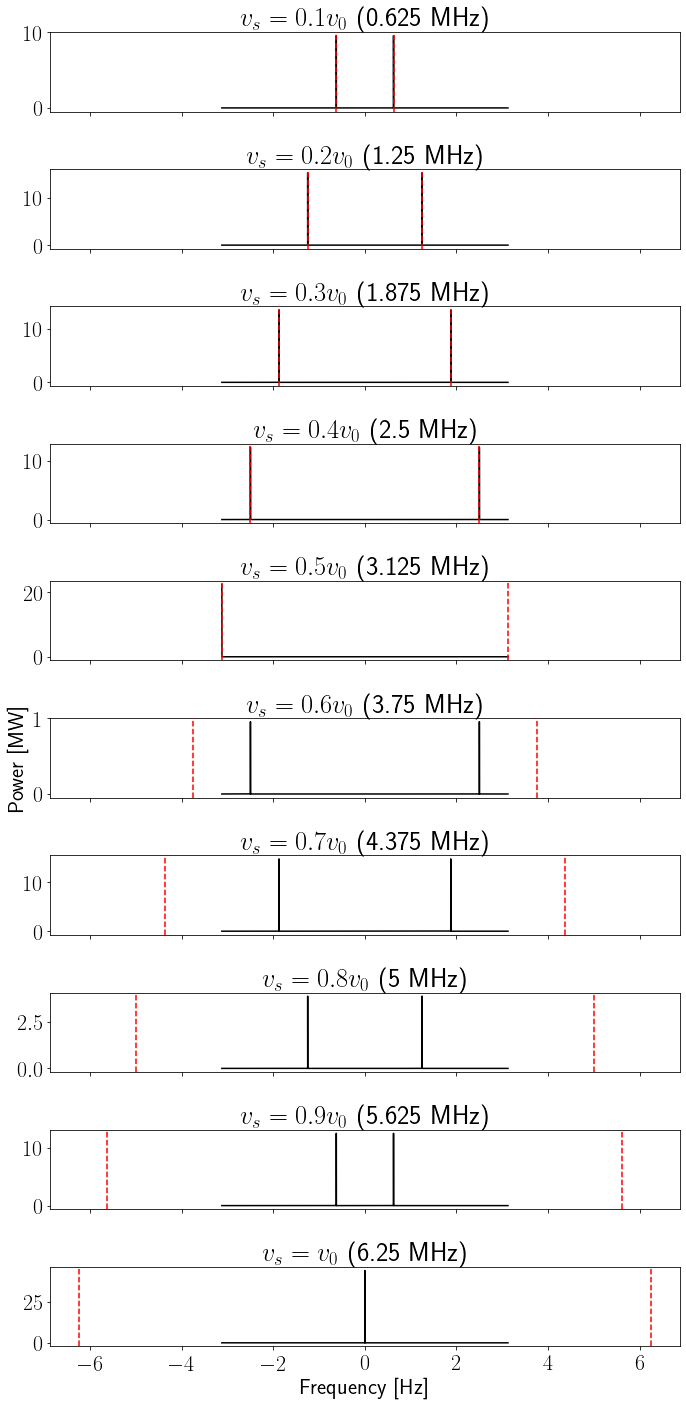

In [8]:
# plotting the fourier power spectrums
plt.rcParams["figure.figsize"] = (10, 20)

fig, ax = plt.subplots(10, 1, sharex = True)

for i in range(len(names)):
    freqs = np.fft.fftfreq(16000, d=dt)
    ax[i].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data[names[i]]/(2**15))).real**2/(10**6), c='black')
    ax[i].axvline(true_freqs[i], linestyle='--', c='red', zorder=5)
    ax[i].axvline(-true_freqs[i], linestyle='--', c='red', zorder=5)
    
    if i == 9:
        ax[i].set_title('$v_s = v_0$ ({})'.format(names[i]))
        ax[i].set_xlabel('Frequency [Hz]')
    else:
        ax[i].set_title('$v_s = 0.{}v_0$ ({})'.format(i+1, names[i]))  #CHANGE TO NU
        
ax[5].set_ylabel('Power [MW]')

plt.tight_layout()
plt.savefig('figures/power_spectra.eps')

In [9]:
scipy.signal.find_peaks(np.fft.fftshift(np.fft.fft(data[names[4]]/(2**15))).real**2/(10**6),
                       threshold=0.00004)

(array([   11, 15989]),
 {'left_thresholds': array([1.11292946e-04, 4.93645518e-05]),
  'right_thresholds': array([4.93645518e-05, 1.11292946e-04])})

In [10]:
peak_freq_vals = np.zeros(len(true_freqs)) + 1

for i in range(len(true_freqs)):
    peak_i = scipy.signal.find_peaks(np.fft.fftshift(np.fft.fft(data[names[i]]/(2**15))).real**2/(10**6), 
                                     threshold=0.00004)
    
    if len(peak_i[0]) == 0:
        peak_freq_vals[i] = np.nan
        
    else:
        peak_freq = abs(np.fft.fftshift(freqs)[peak_i[0][0]])
        peak_freq_vals[i] = peak_freq.value

In [11]:
peak_freq_vals

array([0.62617188, 1.25195312, 1.87734375, 2.50351563, 3.12070313,
       2.5       , 1.87929688, 1.25625   , 0.625     , 0.        ])

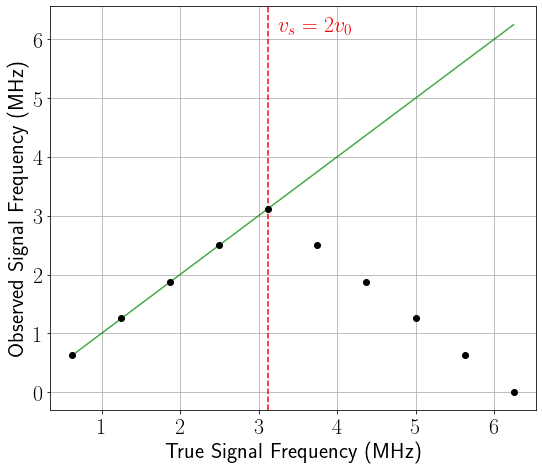

In [12]:
plt.rcParams["figure.figsize"] = (8, 7)
plt.grid(zorder=0)

plt.scatter(true_freqs, peak_freq_vals, c='k',zorder=3)
plt.plot(true_freqs, true_freqs, c='green', alpha=0.7, zorder=2)

plt.xlabel('True Signal Frequency (MHz)')
plt.ylabel('Observed Signal Frequency (MHz)')

plt.axvline(6.25/2, c='red', linestyle='--')
plt.text(3.25, 6.15, '$v_s = 2v_0$', c='red')

plt.tight_layout()
plt.savefig('figures/obs_v_true.jpg')

# 5.3

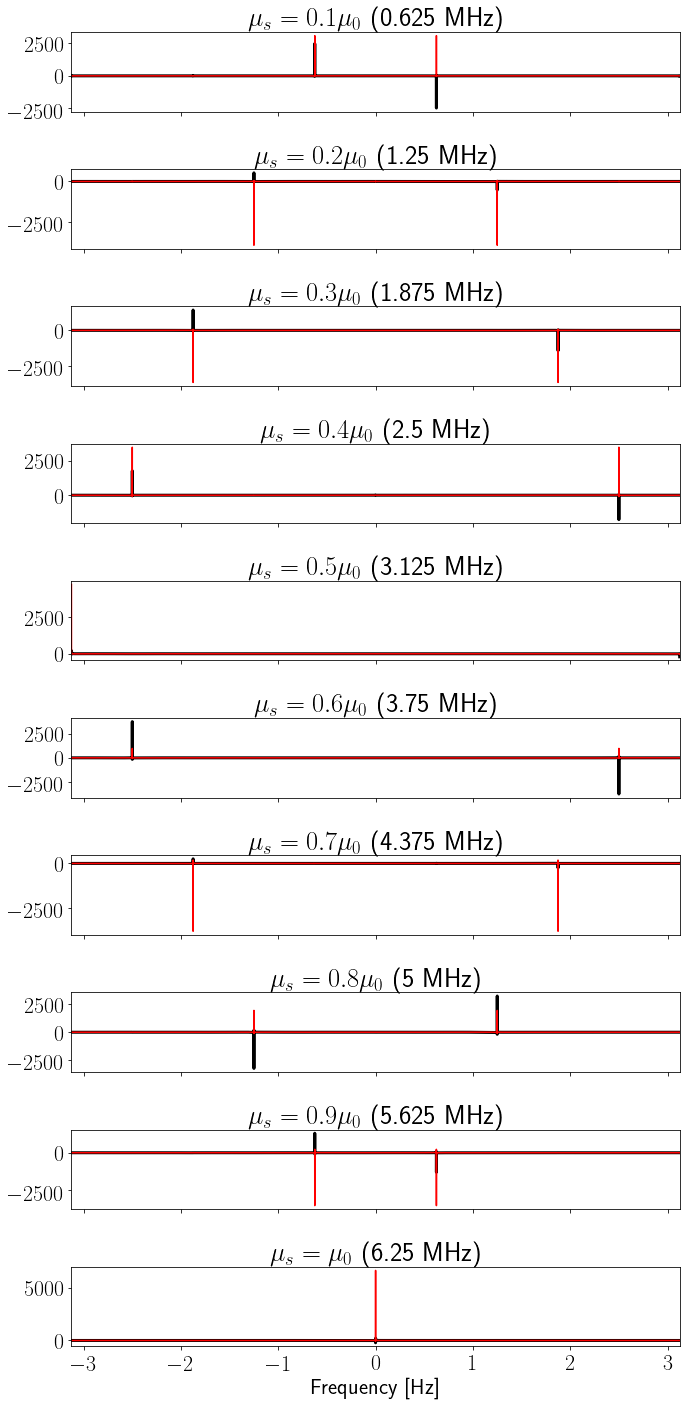

In [13]:
# voltage spectra
plt.rcParams["figure.figsize"] = (10, 20)

fig, ax = plt.subplots(10, 1, sharex = True)

freqs = np.fft.fftfreq(len(data[names[0]]), d=dt)
ax[0].set_xlim(min(freqs.value), max(freqs.value))

for i in range(len(names)):
    ax[i].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data[names[i]]/(2**15))).imag, c='black', linewidth = 3)
    ax[i].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data[names[i]]/(2**15))).real, c='red')
    
    if i == 9:
        ax[i].set_title('$\mu_s = \mu_0$ ({})'.format(names[i]))
        ax[i].set_xlabel('Frequency [Hz]')
    else:
        ax[i].set_title('$\mu_s = 0.{}\mu_0$ ({})'.format(i+1, names[i]))  #CHANGE TO NU

plt.tight_layout()
plt.savefig('figures/real_and_imag.jpg')

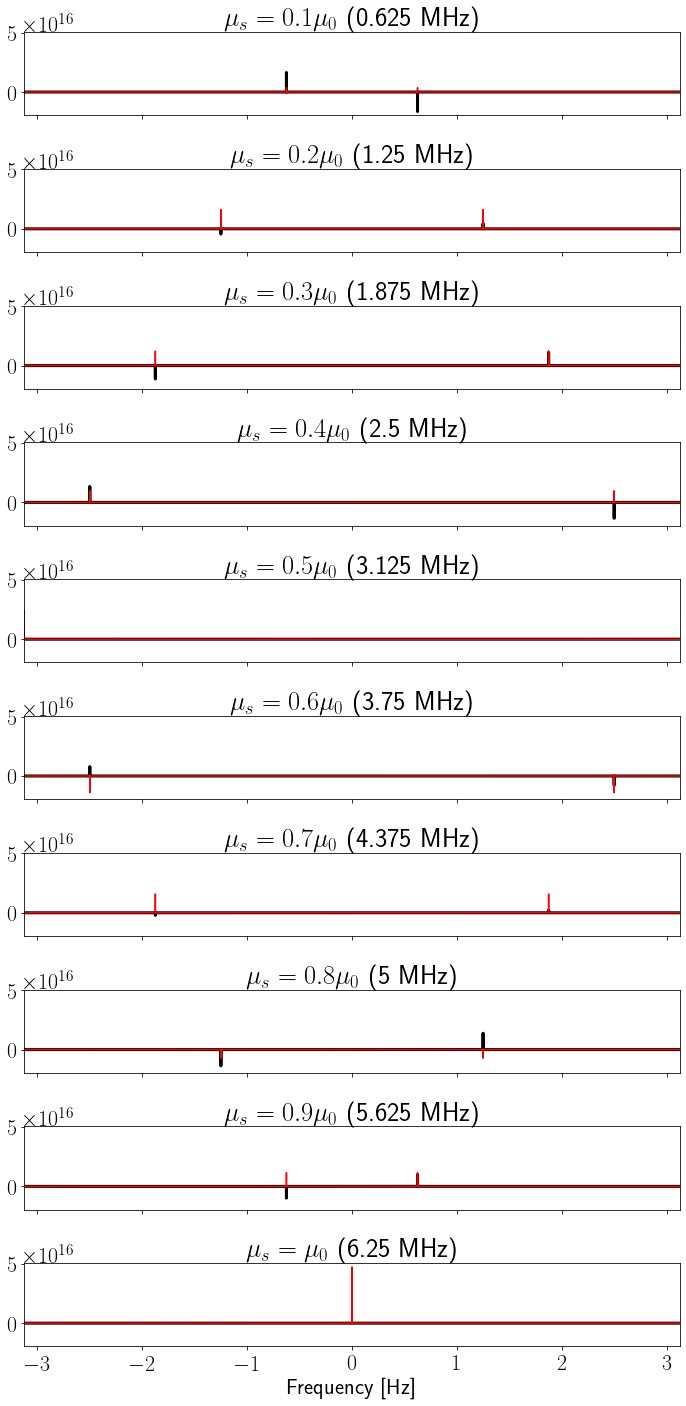

In [14]:
# power spectra
plt.rcParams["figure.figsize"] = (10, 20)

fig, ax = plt.subplots(10, 1, sharex = True, sharey=True)

freqs = np.fft.fftfreq(len(data[names[0]]), d=dt)
ax[0].set_xlim(min(freqs.value), max(freqs.value))

for i in range(len(names)):
    ax[i].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data[names[i]])**2).imag, c='black', linewidth = 3)
    ax[i].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data[names[i]])**2).real, c='red')
    
    if i == 9:
        ax[i].set_title('$\mu_s = \mu_0$ ({})'.format(names[i]))
        ax[i].set_xlabel('Frequency [Hz]')
    else:
        ax[i].set_title('$\mu_s = 0.{}\mu_0$ ({})'.format(i+1, names[i]))  #CHANGE TO NU

plt.tight_layout()
plt.savefig('figures/real_imag_power.jpg')

## inverse fourier transform

/Users/aylaweitz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/aylaweitz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


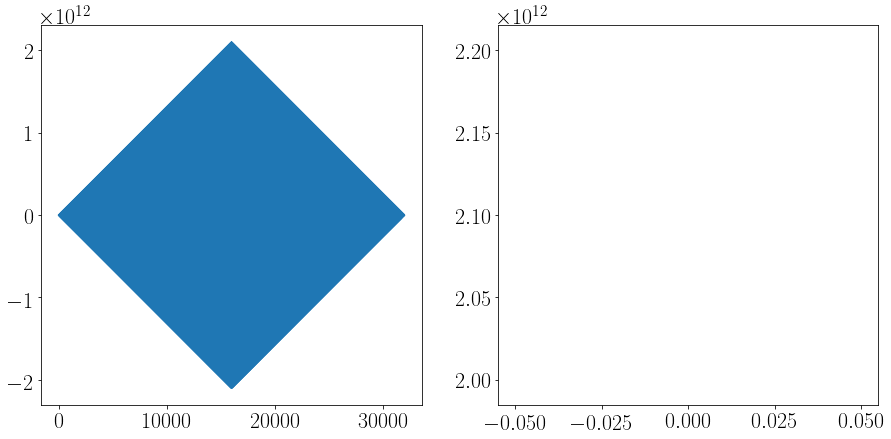

In [15]:
plt.rcParams["figure.figsize"] = (15, 7)

fig, ax = plt.subplots(1, 2)
ax[0].plot(scipy.signal.correlate(np.fft.ifft(np.fft.fft(data[names[0]])), data[names[0]]))
ax[1].plot(np.correlate(np.fft.ifft(np.fft.fft(data[names[0]])), data[names[0]]))

In [16]:
# figure our ugradio dft

# 5.4

/Users/aylaweitz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/aylaweitz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


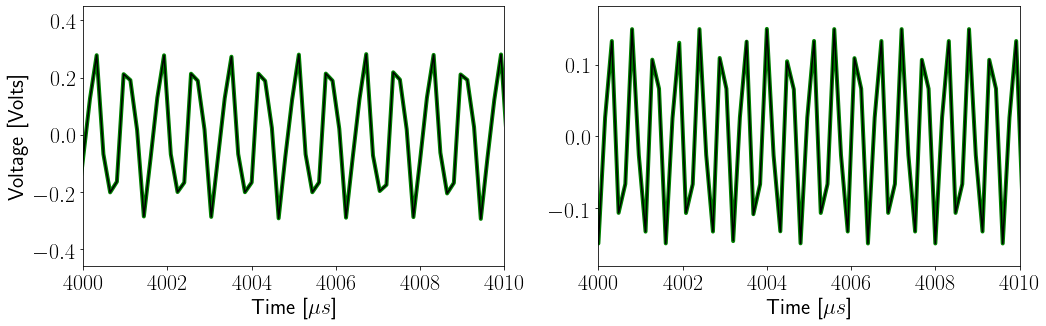

In [436]:
# proving correlation theorem
times = np.arange(0, 48000) * dt.value

data1 = list(data[names[1]]/(2**15))
data1 = list(np.zeros(len(data1))) + data1 + list(np.zeros(len(data1)))

data2 = list(data[names[4]]/(2**15))
data2 = list(np.zeros(len(data2))) + data2 + list(np.zeros(len(data2)))


# convolving functions
correlation = np.correlate(data1, data2, mode='same')

# multiplying fourier transform
multiply_fourier = np.fft.ifft(np.fft.fft(data1) * np.conj(np.fft.fft(data2)))


# multiplying functions
multiplied = data1 * np.conj(data2)

#convolving FTs
correlate_fourier_shift = np.fft.ifft(np.fft.fftshift(np.correlate(np.fft.fft(data1), np.fft.fft(data2), mode='same'))) /48000


plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(1, 2)

# ax[0].plot(np.fft.fftshift(multiply_fourier), correlation + 1, c='k')
ax[0].plot(times, np.fft.fftshift(multiply_fourier), linewidth=4, c='green')
ax[0].plot(times, correlation, c='k')

ax[1].plot(times, correlate_fourier_shift, linewidth=4, c='green')
ax[1].plot(times, multiplied, c='k')


ax[0].set_xlim(4000, 4010)
ax[1].set_xlim(4000, 4010)

ax[0].set_ylabel('Voltage [Volts]')
ax[0].set_xlabel('Time [$\mu s$]')
ax[1].set_xlabel('Time [$\mu s$]')

plt.tight_layout()
plt.savefig('figures/correlation.eps')


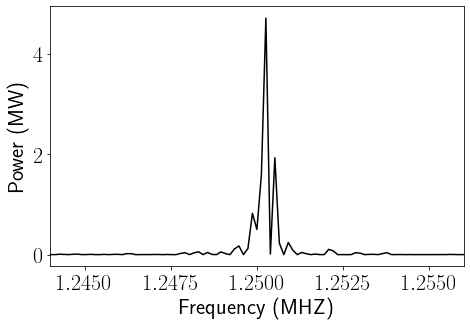

In [438]:
# SPECTRAL LEAKAGE IN POWER SPECTRA
plt.rcParams["figure.figsize"] = (7, 5)

multiply_freq = np.fft.fftshift(np.fft.fftfreq(len(np.fft.fft(multiply_fourier)), d=dt)).value

plt.plot(multiply_freq, np.fft.fftshift(np.fft.fft(multiply_fourier)).real**2/10**5, c='k')

# x = np.arange(int(min(multiply_freq)), int(max(multiply_freq)))
# plt.plot( np.sinc(x)**2 )

plt.xlim(1.244, 1.256)
plt.xlabel('Frequency (MHZ)')
plt.ylabel('Power (MW)')

plt.tight_layout()
plt.savefig('figures/leakage.eps')

# 5.5

In [412]:
# reading in data
data_10 = np.load('tenth.npy')
data_100 = np.load('hundredth.npy')
data_1000 = np.load('thousandth.npy')

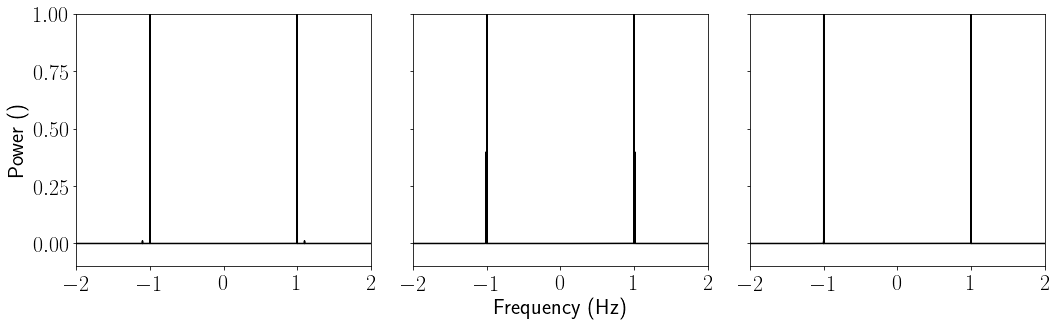

In [445]:
# frequency resolution
plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(1, 3, sharey=True, sharex=True)

freqs = np.fft.fftfreq(16000, dt)

#tenth
ax[0].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data_10[0][0]).real)**2/(10**15), c='black')
# ax[0].set_yscale('log')
ax[0].set_ylabel('Power ()')

#hundredth
ax[1].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data_100[0][0]).real)**2/(10**15), c='black')
# ax[1].set_yscale('log')
ax[1].set_xlabel('Frequency (Hz)')

#thousandth
ax[2].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data_1000[0][0]).real)**2/(10**15), c='black')
# ax[2].set_yscale('log')
ax[2].set_xlim(-2, 2)
ax[2].set_ylim(-0.1, 1)

plt.tight_layout()

# 5.6

In [20]:
# reading in the data
data_w1 = np.load('nyquist_window_1.npy')
data_w2 = np.load('nyquist_window_2.npy')
data_w25 = np.load('nyquist_window_2_5.npy')
data_w3 = np.load('nyquist_window_3.npy')
data_w35 = np.load('nyquist_window_3_5.npy')
data_w4 = np.load('nyquist_window_4.npy')
data_w5 = np.load('nyquist_window_4.npy')
data_w6 = np.load('nyquist_window_6.npy')

data_w = [data_w1, data_w2, data_w25, data_w3, data_w35, data_w4, data_w5, data_w6]

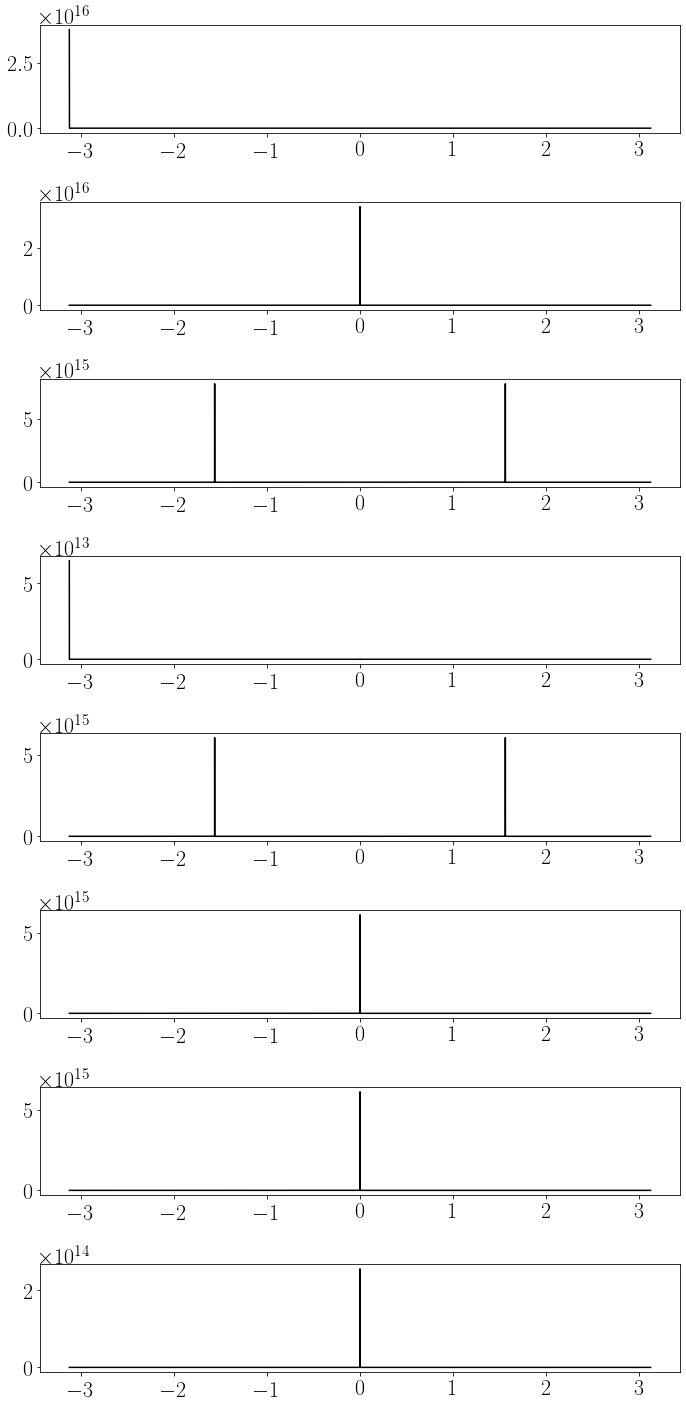

In [21]:
# niquist windows
plt.rcParams["figure.figsize"] = (10, 20)
fig, ax = plt.subplots(8, 1)

freqs = np.fft.fftfreq(16000, dt)

for i in range(len(data_w)):
    ax[i].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data_w[i][0][0]).real)**2, c='black')
    
    ax[i].plot
    
plt.tight_layout()

# 5.7

In [22]:
# reading in data
data_noise = np.load('blocks_100.npy')
print(data_noise.shape)

(1, 100, 16000)


In [23]:
# average over the 100 blocks

In [24]:
# one block
mean = np.mean(data_noise[0][0])
variance = np.var(data_noise[0][0])
std = np.std(data_noise[0][0])

print('mean: {}'.format(mean))
print('variance: {}'.format(variance))
print('std: {}'.format(std))

mean: -43.696
variance: 42765.731584
std: 206.79877075069862


In [25]:
# all 100 blocks
mean = np.mean(data_noise[0])
variance = np.var(data_noise[0])
std = np.std(data_noise[0])

print('mean: {}'.format(mean))
print('variance: {}'.format(variance))
print('std: {}'.format(std))

mean: -11.80656
variance: 34113.20034096639
std: 184.69759159492685


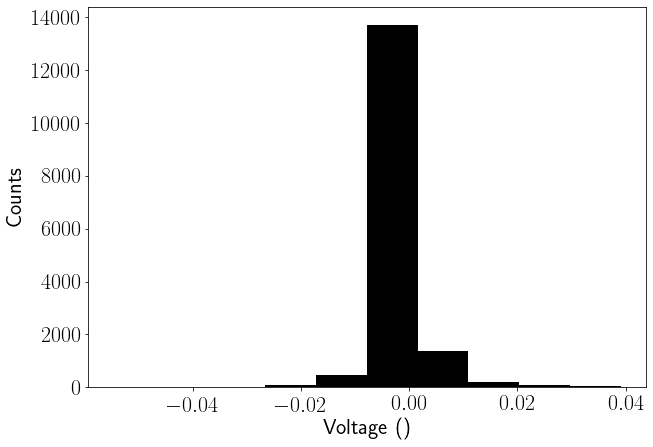

In [26]:
# histogram of noise
plt.rcParams["figure.figsize"] = (10, 7)
plt.hist(data_noise[0][0]/2**15, color='black')
plt.xlabel('Voltage ()')
plt.ylabel('Counts')

x = np.arange(min(data_noise[0][0]), max(data_noise[0][0]))
# plt.plot(x, 5000000*scipy.stats.norm.pdf(x, mean, std), c='red', zorder=10)

plt.show()

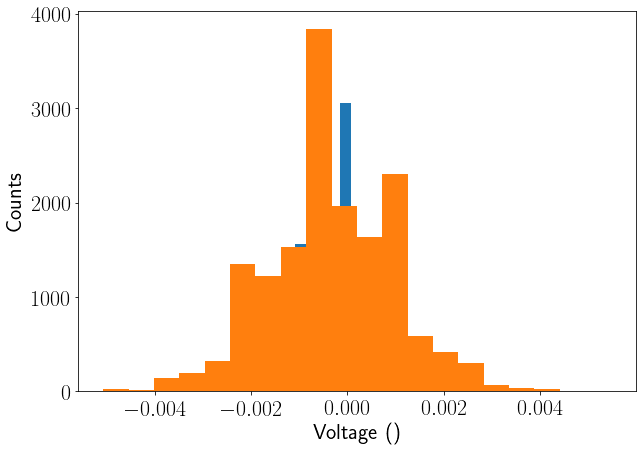

In [49]:
# histogram of noise
plt.rcParams["figure.figsize"] = (10, 7)

# mean_1 = np.mean(data_noise[0][0], axis=0)
# std_1 = np.std(data_noise[0][0], axis=0)

mean_5 = np.mean(data_noise[0][:5], axis=0)
std_5 = np.std(data_noise[0][:5], axis=0)

mean_20 = np.mean(data_noise[0][:20], axis=0)
std_20 = np.std(data_noise[0][:20], axis=0)

mean_100 = np.mean(data_noise[0], axis=0)
std_100 = np.std(data_noise[0], axis=0)

# plt.hist(data_noise[0][0]/2**15, bins=30)
# plt.hist(sum(data_noise[0][:5])/2**15, bins=20)
# plt.hist(sum(data_noise[0][:20])/2**15, bins=20)
# plt.hist(sum(data_noise[0][:100])/2**15, bins=20)

plt.hist(mean_100/2**15, bins=20)
plt.hist(mean_20/2**15, bins=20)
plt.hist(mean_5/2**15, bins=20)


# plt.xlim(-0.015, 0.015)

plt.xlabel('Voltage ()')
plt.ylabel('Counts')

# x = np.arange(min(avg/2**15), max(avg/2**15))
# plt.plot(x, 100*scipy.stats.norm.pdf(x, mean, std), c='red', zorder=10)

plt.show()

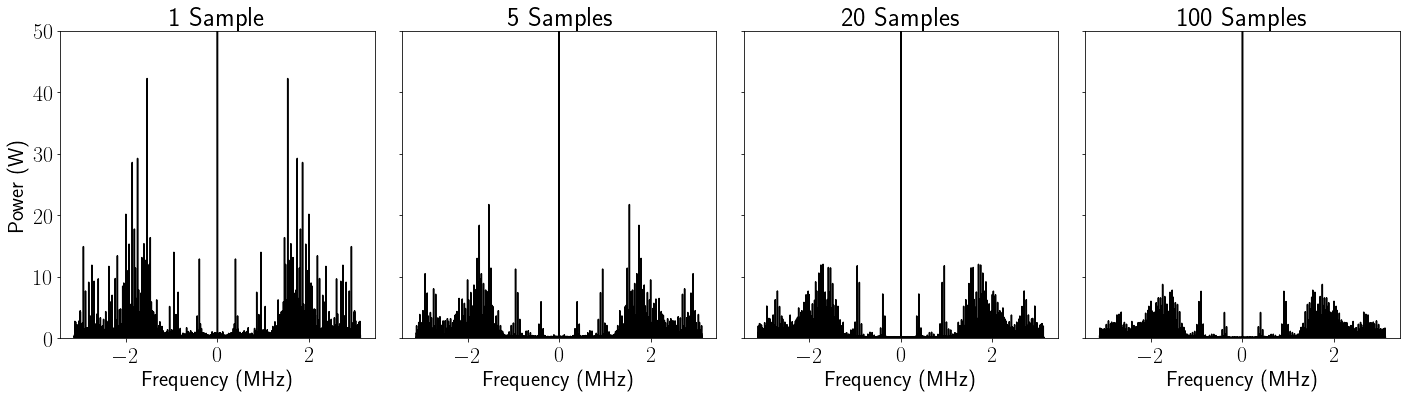

In [170]:
# fourier transform of noise



# first take power spectra of all block and THEN average them!
plt.rcParams["figure.figsize"] = (20, 6)
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True)

freqs = np.fft.fftfreq(16000, d=dt)

ax[0].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(data_noise[0][0]/(2**15))).real**2, 
               c='black')
ax[0].set_title('1 Sample')

ax[0].set_xlabel('Frequency (MHz)')
ax[0].set_ylabel('Power (W)')


ax[1].plot(np.fft.fftshift(freqs), np.mean(np.fft.fftshift(np.fft.fft(data_noise[0][0:5]/(2**15))).real**2, axis=0), 
               c='black')
ax[1].set_title('5 Samples')
ax[1].set_xlabel('Frequency (MHz)')


ax[2].plot(np.fft.fftshift(freqs), np.mean(np.fft.fftshift(np.fft.fft(data_noise[0][0:20]/(2**15))).real**2, axis=0), 
               c='black')
ax[2].set_title('20 Samples')
ax[2].set_xlabel('Frequency (MHz)')

ax[3].plot(np.fft.fftshift(freqs), np.mean(np.fft.fftshift(np.fft.fft(data_noise[0][0:100]/(2**15))).real**2, axis=0), 
               c='black')
ax[3].set_title('100 Samples')
ax[3].set_xlabel('Frequency (MHz)')


ax[0].set_ylim(0, 50)


plt.tight_layout()

plt.savefig('figures/noise.eps')



In [159]:
np.mean(np.fft.fftshift(np.fft.fft(data_noise[0][0:100]/(2**15))).real**2)

0.2681484985351563

In [195]:
num_samples = np.arange(1, 100, 5)
peak_heights = []

for i in num_samples:

    peaks = scipy.signal.find_peaks(np.mean(np.fft.fftshift(np.fft.fft(data_noise[0][:i]/(2**15))).real**2, 
                                            axis=0))[0]

    sorted_peak_vals = np.sort(np.mean(np.fft.fftshift(np.fft.fft(data_noise[0][:i]/(2**15))).real**2, 
                                            axis=0)[peaks])
    
    peak_heights.append(sorted_peak_vals[-2])

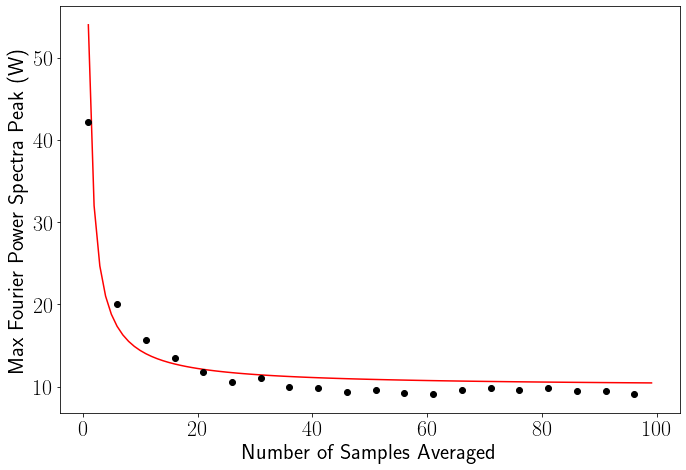

In [453]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.scatter(num_samples, peak_heights, c='black')

plt.ylabel('Max Fourier Power Spectra Peak (W)')
plt.xlabel('Number of Samples Averaged')

x = np.arange(1, 100)
plt.plot(x, 44/x + 10, c='red', zorder=0)

plt.tight_layout()
plt.savefig('figures/noise_scatter.eps')

In [ ]:
# POWER. SQUARE FIRST AND THEN AVERAGE (5.7)
# NOISE SHOULD REDUCE AND SCATTER THE MORE YOU AVERAGE

# 7.1

In [66]:
# reading in data
mixed_plus = np.load('mixed_plus.npy')
mixed_minus = np.load('mixed_minus.npy')

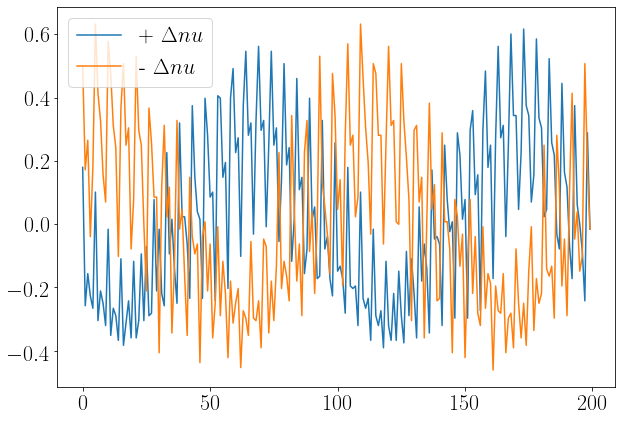

In [83]:
# waveform
plt.plot(mixed_plus[0][0][:200]/2**15, label="+ $\Delta nu$")
plt.plot(mixed_minus[0][0][:200]/2**15, label="- $\Delta nu$")

plt.legend()

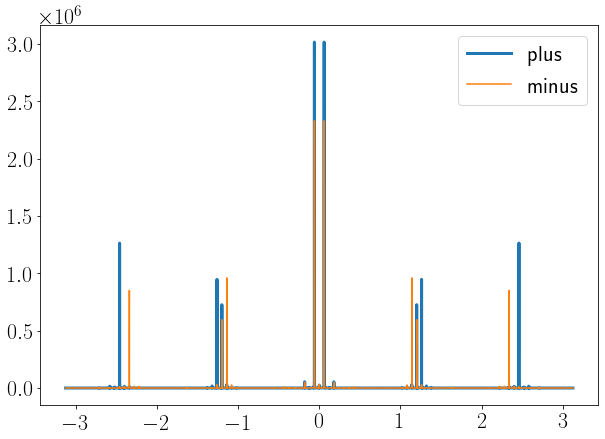

In [87]:
# power spectra
freqs = np.fft.fftfreq(16000, dt)
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(np.fft.fft(mixed_plus[0][0]/2**15))**2), linewidth = 3, label='plus')
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(np.fft.fft(mixed_minus[0][0]/2**15))**2), label='minus')

plt.legend()


/Users/aylaweitz/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


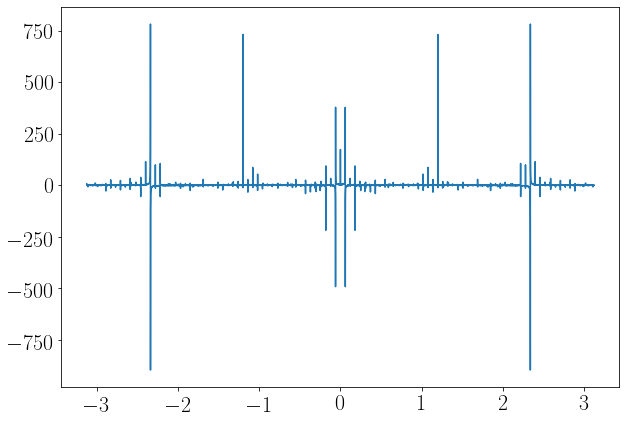

In [91]:
# fourier
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.fft.fft(mixed_minus[0][0]/2**15)))

# 7.2

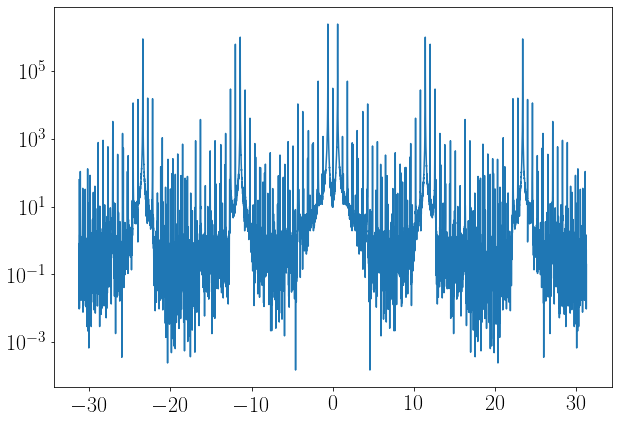

In [94]:
# Intermodulation Products in Real Mixers

plt.plot(np.fft.fftshift(freqs) * 10, np.fft.fftshift(np.abs(np.fft.fft(mixed_minus[0][0]/2**15))**2), label='minus')
plt.yscale('log')

# 7.3

In [ ]:
# reading in data

In [ ]:
# The Single-Sideband Mixer (SSB Mixer)

In [ ]:
# A + ij*B before performing fourier transform